Δv for Earth → Mars Hohmann transfer: 5.65 km / s


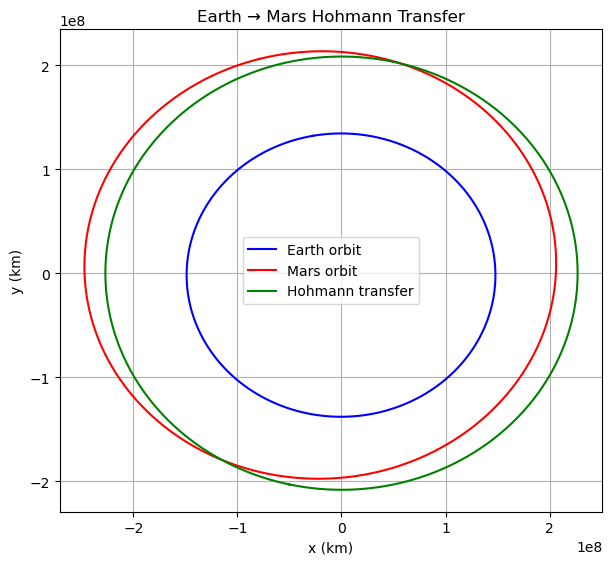

In [10]:
# Hohmann Transfer Simulation using Poliastro (stable version)

# !pip install poliastro

import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.time import Time
from poliastro.bodies import Earth, Mars, Sun
from poliastro.twobody import Orbit
from poliastro.ephem import Ephem
from poliastro.maneuver import Maneuver

# 1. Define epoch (reference date)
epoch = Time("2025-01-01", scale="tdb")

# 2. Get Earth's and Mars's heliocentric orbits at that epoch
earth_ephem = Ephem.from_body(Earth, epoch)
mars_ephem = Ephem.from_body(Mars, epoch)

earth_orbit = Orbit.from_ephem(Sun, earth_ephem, epoch)
mars_orbit = Orbit.from_ephem(Sun, mars_ephem, epoch)

# 3. Create a Hohmann transfer maneuver from Earth orbit to Mars orbit
man = Maneuver.hohmann(earth_orbit, mars_orbit.a)
transfer = earth_orbit.apply_maneuver(man)

# 4. Delta-v calculation
dv_total = man.get_total_cost()
print(f"Δv for Earth → Mars Hohmann transfer: {dv_total:.2f}")

# 5. Plot with matplotlib only
def plot_orbit(ax, orbit, label, color):
    # Sample 200 points along the orbit
    rr = orbit.sample(200).xyz.T.to(u.km)   # no .to_coords()
    ax.plot(rr[:, 0], rr[:, 1], label=label, color=color)

fig, ax = plt.subplots(figsize=(7,7))

plot_orbit(ax, earth_orbit, "Earth orbit", "blue")
plot_orbit(ax, mars_orbit, "Mars orbit", "red")
plot_orbit(ax, transfer, "Hohmann transfer", "green")

# Format the plot
ax.set_xlabel("x (km)")
ax.set_ylabel("y (km)")
ax.set_title("Earth → Mars Hohmann Transfer")
ax.legend()
ax.grid(True)
ax.set_aspect("equal")

plt.show()